In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate AC(UCB, TP)
def AC(UCB, TP, m1, m2, s=0.00001, P1=0.78, P2=0.95):
    if TP < P1:
        return UCB + 1 / (s + TP ** m1)
    elif P1 <= TP < P2:
        return UCB + 1 / (TP ** m2)
    else:
        return UCB


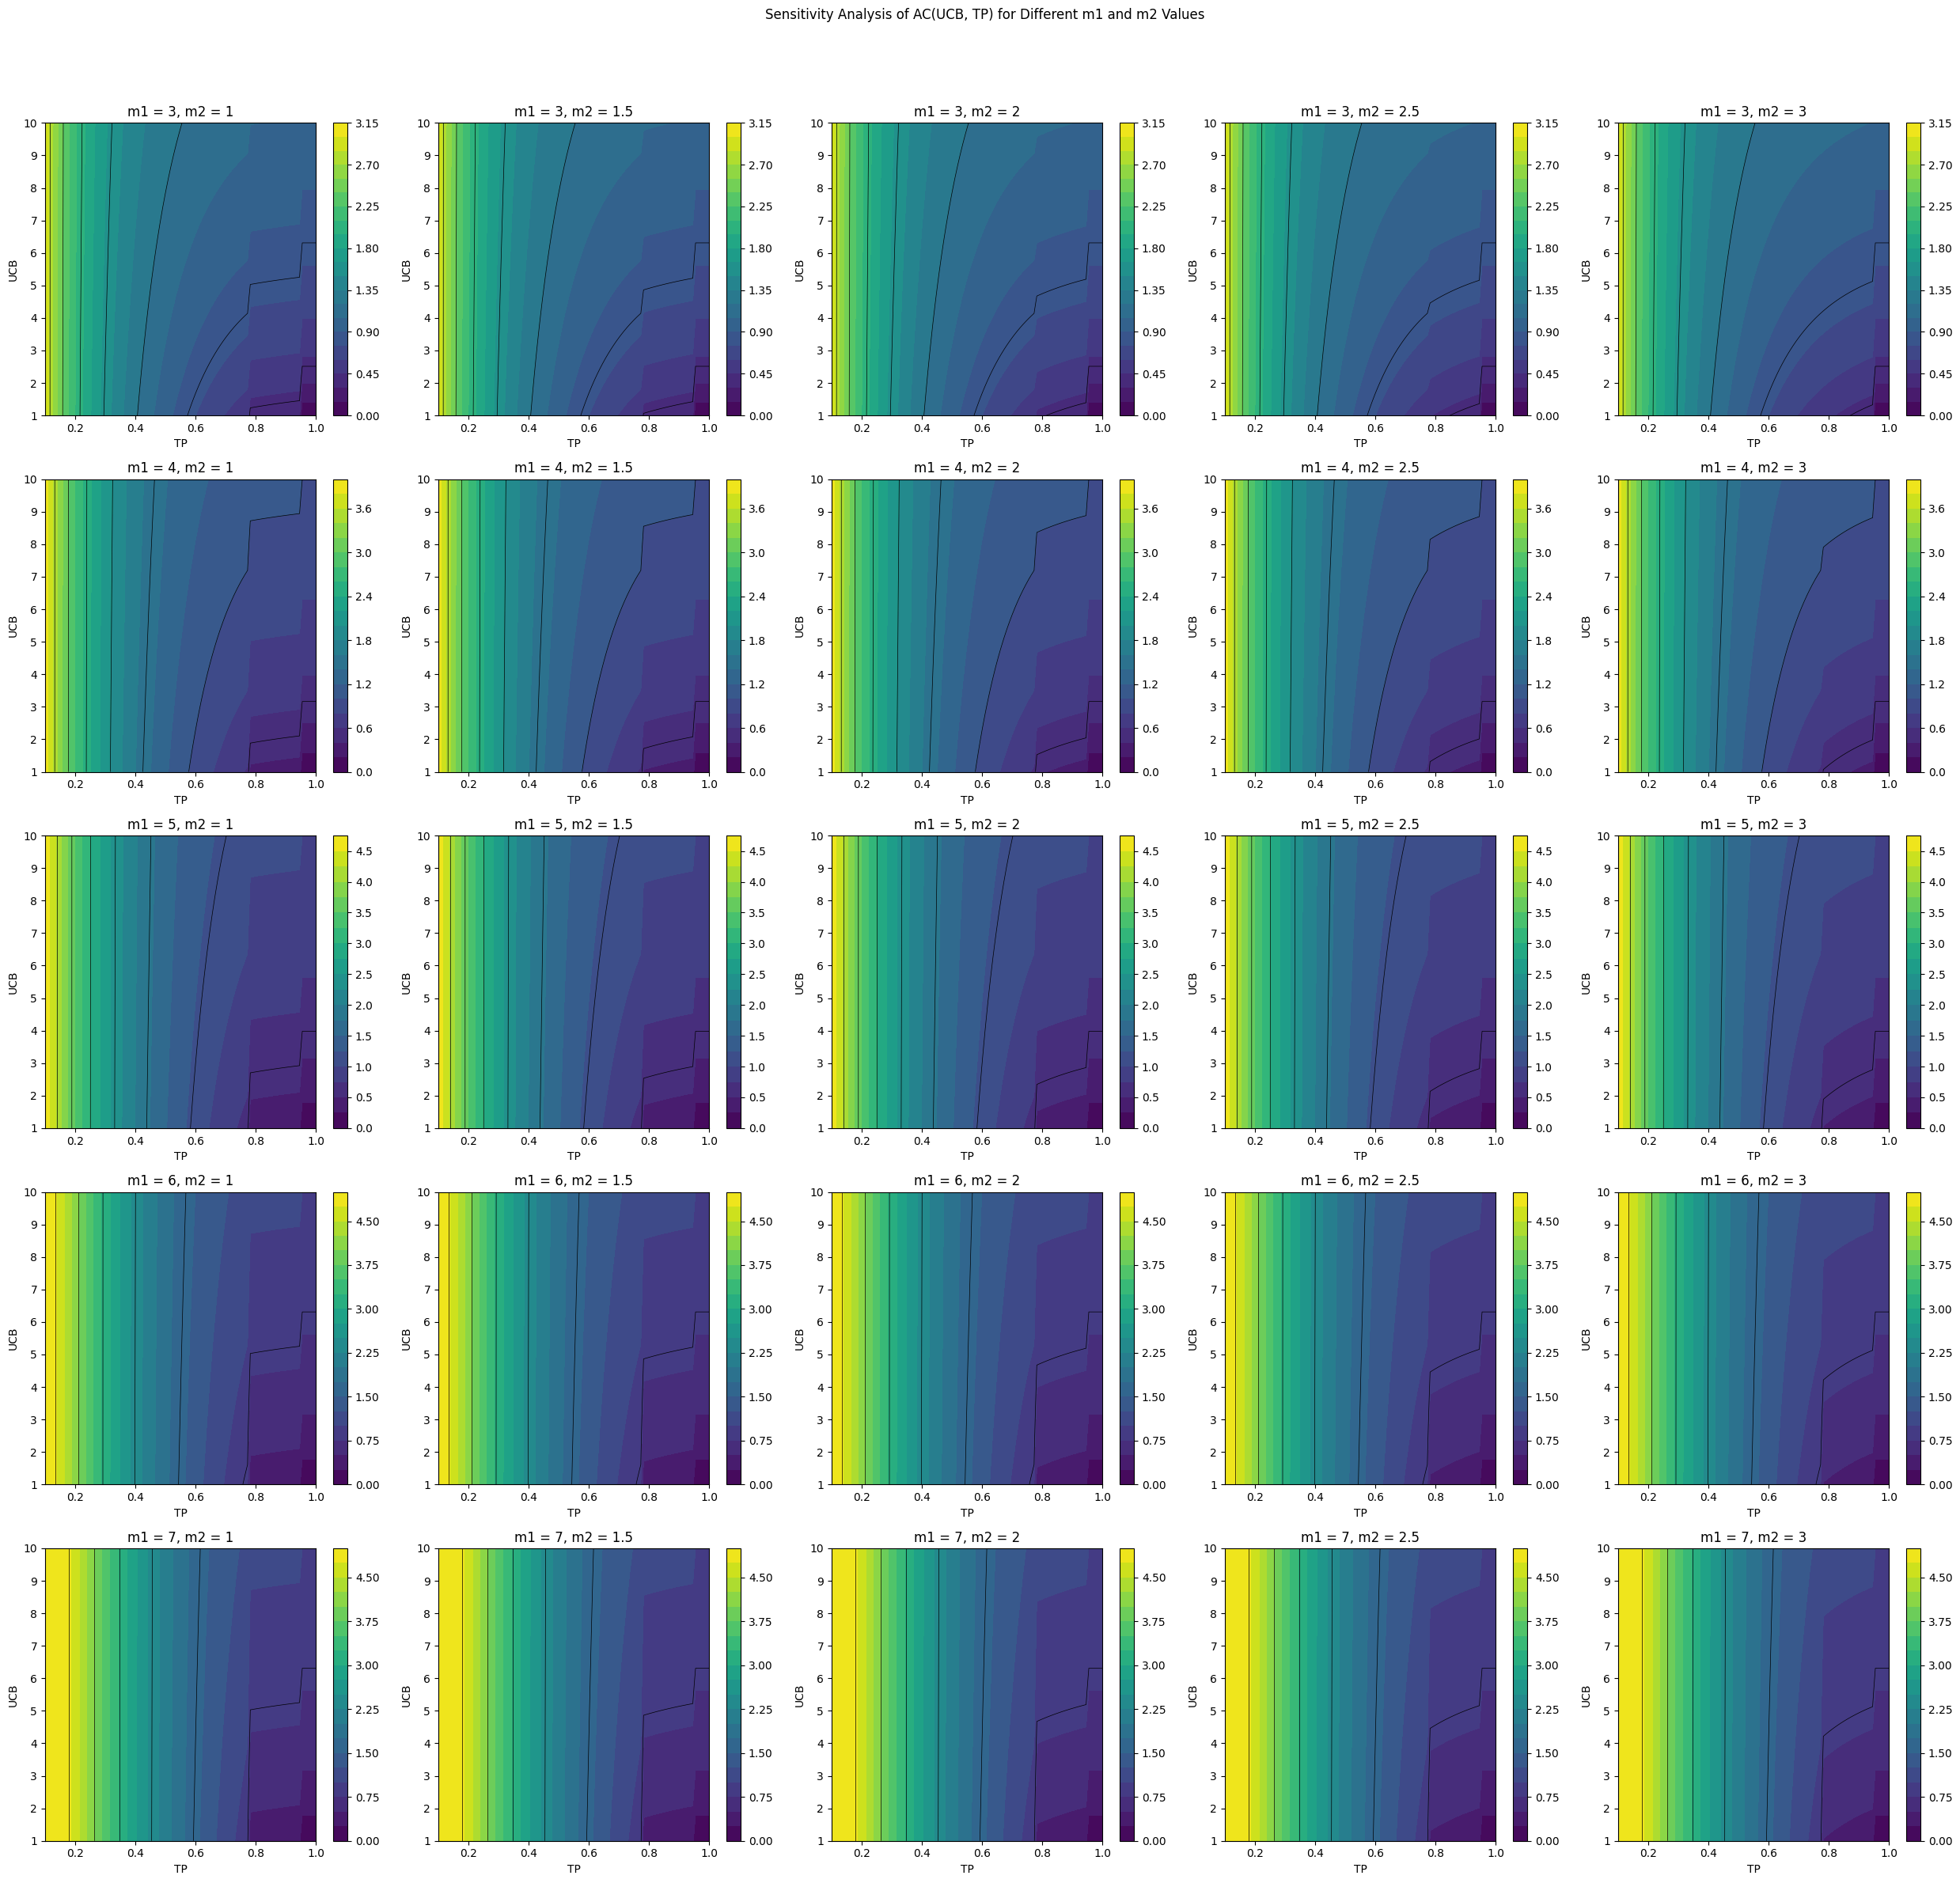

In [41]:
# Parameters
TP_values = np.linspace(0.1, 1.0, 100)       # Range for TP
UCB_values = np.linspace(1, 10, 100)      # Range for UCB
m1_values = [3, 4, 5, 6, 7]                    # Different values for m1
m2_values = [1, 1.5, 2, 2.5, 3]                    # Different values for m2

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(25, 25))
fig.suptitle("Sensitivity Analysis of AC(UCB, TP) for Different m1 and m2 Values")

# Generate contour plots for each combination of m1 and m2
for i, m1 in enumerate(m1_values):
    for j, m2 in enumerate(m2_values):
        # Create a meshgrid for TP and UCB values
        TP_grid, UCB_grid = np.meshgrid(TP_values, UCB_values)
        # Calculate AC values for each combination of TP and UCB
        AC_grid = np.vectorize(lambda TP, UCB: AC(UCB, TP, m1, m2))(TP_grid, UCB_grid)
        AC_grid = np.log10(AC_grid)
        # Plot the contour plot
        ax = axes[i,j]
        contour = ax.contourf(TP_grid, UCB_grid, AC_grid, levels=20, cmap='viridis')
        cbar = fig.colorbar(contour, ax=ax, orientation="vertical")
        ax.contour(TP_grid, UCB_grid, AC_grid, colors='black', linewidths=0.5)

        # Set the title and labels for each subplot
        ax.set_title(f"m1 = {m1}, m2 = {m2}")
        ax.set_xlabel("TP")
        ax.set_ylabel("UCB")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def calculate_y(TP, m1):
    return 1 / (0.00001 + TP ** m1)

# def calculate_y2(TP, m1, m2, s=0.00001, P1=0.78, P2=0.95):
#     if TP < P1:
#         return 1 / (s + TP ** m1)
#     elif P1 <= TP < P2:
#         return 1 / (TP ** m2)
#     else:
#         return 0

def calculate_y2(TP, m1, m2, s=0.00001, P1=0.78, P2=0.95):
    y = np.zeros_like(TP, dtype=float)
    mask1 = TP < P1
    y[mask1] = 1 / (s + TP[mask1] ** m1)
    mask2 = (P1 <= TP) & (TP < P2)
    y[mask2] = 1 / (TP[mask2] ** m2)
    return y

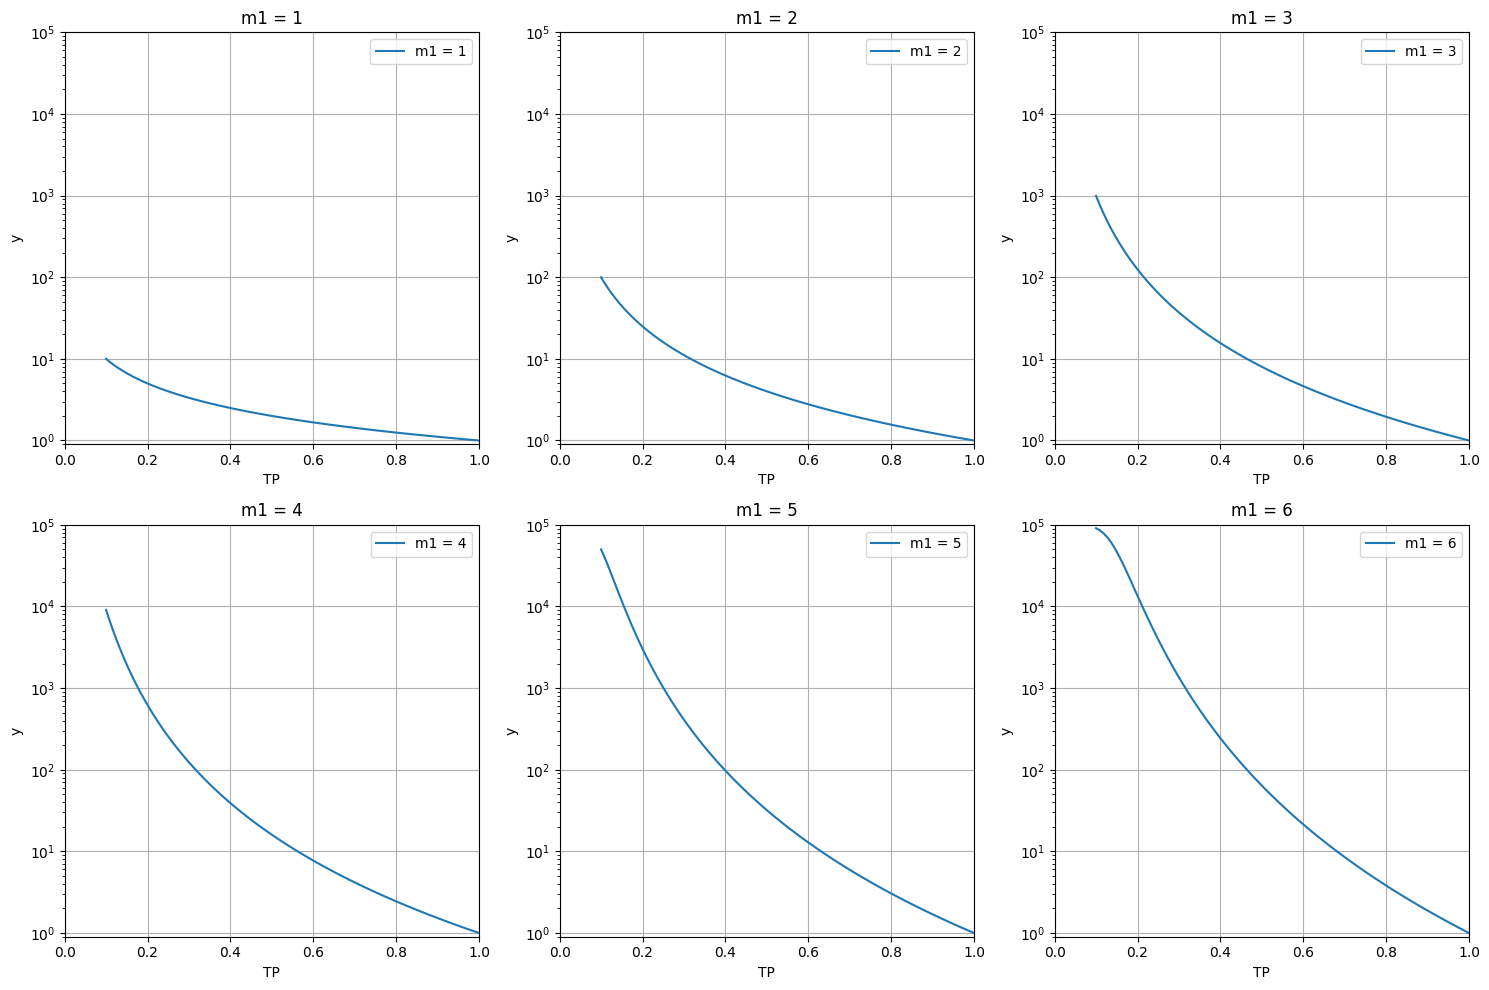

In [49]:
# 创建 TP 的范围
TP = np.linspace(0.1, 1, 100)  # TP 取值从0.1到0.78
m1_values = [1, 2, 3, 4, 5, 6]  # 不同的 m1 值

# 计算 y 的最大值和最小值，以便统一 y 轴范围
y_min = np.inf
y_max = -np.inf
for m1 in m1_values:
    y = calculate_y(TP, m1)
    y_min = min(y_min, np.min(y))
    y_max = max(y_max, np.max(y))

# 创建一个 2x3 的子图网格 (5个m1值，分布在2行3列的子图)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 展示不同 m1 值的情况
for i, m1 in enumerate(m1_values):
    ax = axs[i // 3, i % 3]  # 确定当前子图位置
    y = calculate_y(TP, m1)
    ax.plot(TP, y, label=f'm1 = {m1}')
    ax.set_title(f'm1 = {m1}')
    ax.set_xlabel('TP')
    ax.set_ylabel('y')
    ax.set_ylim([y_min*0.9, 1.1*y_max])  # 设置统一的 y 轴范围
    ax.set_yscale('log')
    ax.set_xlim([0, 1])  # 设置统一的 y 轴范围
    ax.grid(True)
    ax.legend()

# 调整子图间距
plt.tight_layout()
plt.show()

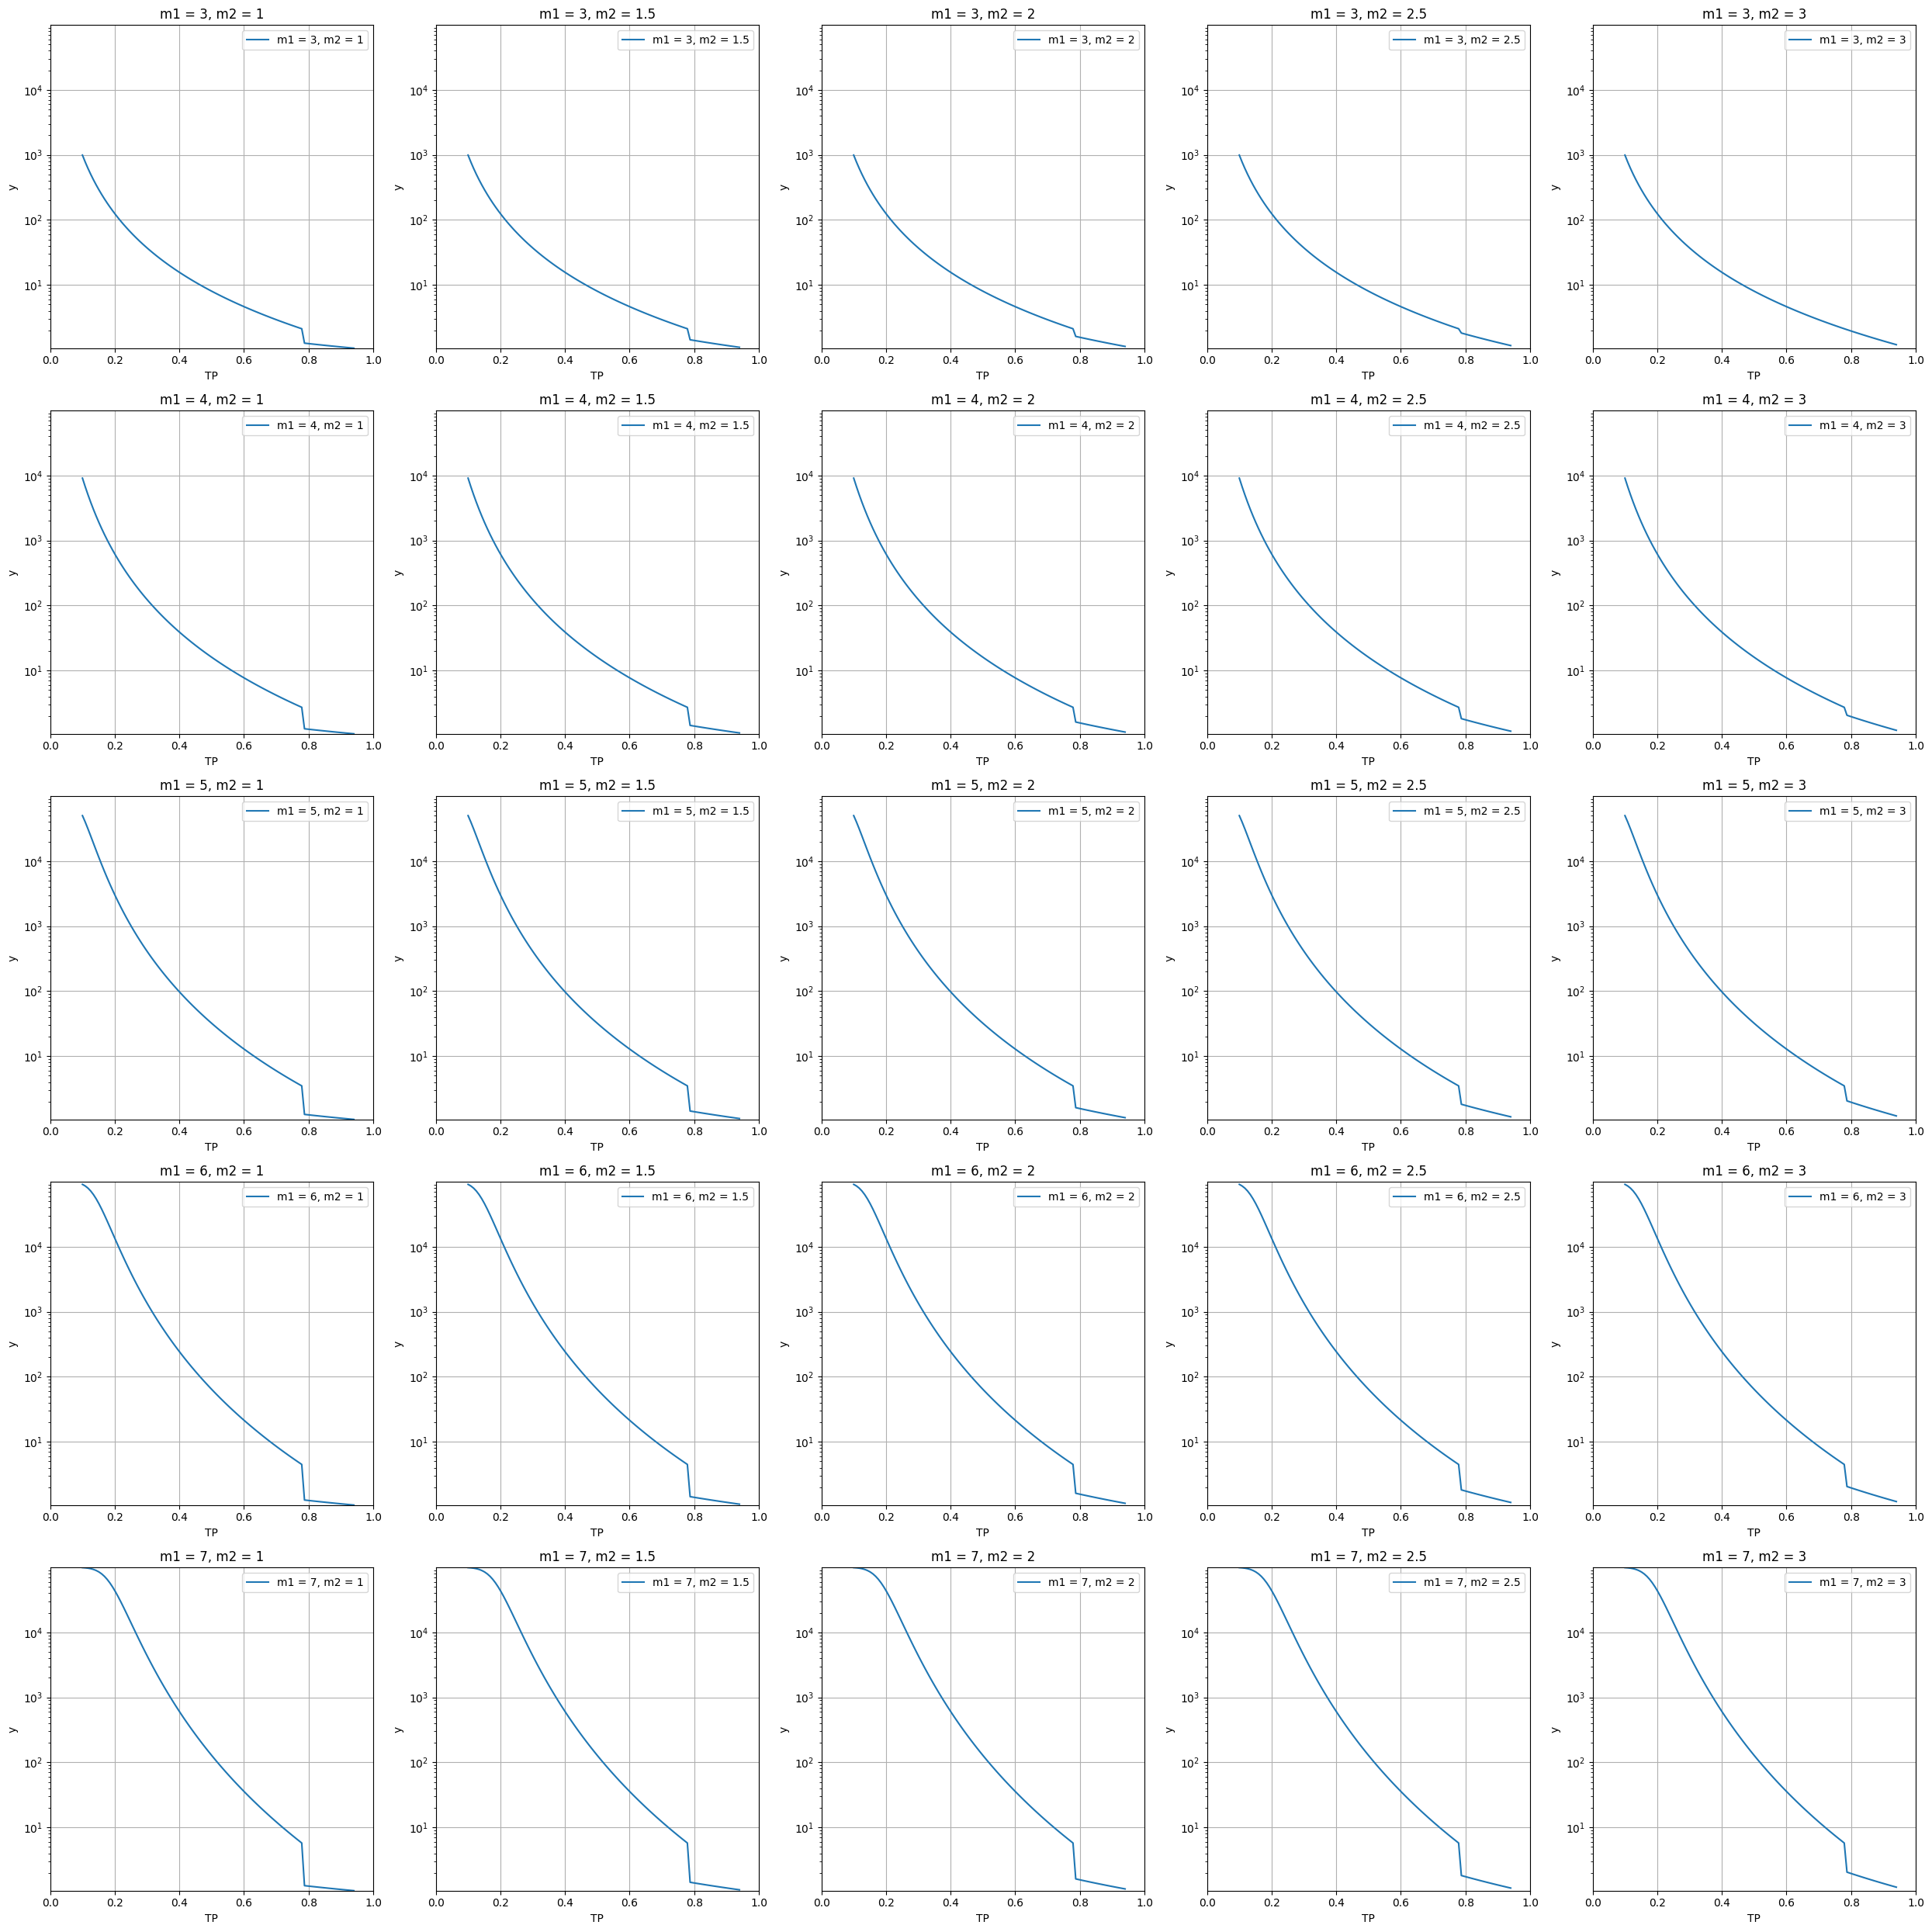

In [82]:
# 创建 TP 的范围
TP = np.linspace(0.1, 0.94, 100)  # TP 取值从0.1到0.78
m1_values = [3, 4, 5, 6, 7]                    
m2_values = [1, 1.5, 2, 2.5, 3]                 

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(25, 25))
# fig.suptitle("Sensitivity Analysis for Different m1 and m2 Values")
y_min = []
y_max = []

for m1 in m1_values:
    for m2 in m2_values:
        y = calculate_y2(TP, m1,m2)
        y_min.append(np.min(y))
        y_max.append(np.max(y))

for i, m1 in enumerate(m1_values):
    for j, m2 in enumerate(m2_values):
        ax = axes[i,j]  # 确定当前子图位置
        y = calculate_y2(TP, m1, m2)
        ax.plot(TP, y, label=f'm1 = {m1}, m2 = {m2}')
        ax.set_title(f'm1 = {m1}, m2 = {m2}')
        ax.set_xlabel('TP')
        ax.set_ylabel('y')
        ax.set_ylim([min(y_min), max(y_max)])  # 设置统一的 y 轴范围
        ax.set_yscale('log')
        ax.set_xlim([0, 1])  # 设置统一的 y 轴范围
        ax.grid(True)
        ax.legend()

# 调整子图间距
plt.tight_layout()
plt.show()